In [159]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the data
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'NSL_regular_season_data_2.csv')
print(data_path)
data = pd.read_csv(data_path)

/workspaces/Wharton-HS-Competition-Soccer-Playoff-Predictions/data/NSL_regular_season_data_2.csv


In [160]:
# Visualize the data
data

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43


In [161]:
# Get all the games that involve team.
team_name = 'OAK'
team_home = data[data['HomeTeam'] == team_name]
team_away = data[data['AwayTeam'] == team_name]
team = pd.concat([team_home, team_away], axis=0)

# Create a new column called 'Winner' that contains 1 if team wins, 0 if team loses
team['is_home'] = np.where(team['HomeTeam'].eq(team_name), 1, 0)
team['Winner'] = np.where(team['is_home'], team['HomeScore'] > team['AwayScore'], team['AwayScore'] > team['HomeScore'])

# Redefine each of the home and away games to be relative to team
team['curr_xG'] = np.where(team['is_home'], team['Home_xG'], team['Away_xG'])
team['opp_xG'] = np.where(team['is_home'], team['Away_xG'], team['Home_xG'])
team['curr_shots'] = np.where(team['is_home'], team['Home_shots'], team['Away_shots'])
team['opp_shots'] = np.where(team['is_home'], team['Away_shots'], team['Home_shots'])
team['curr_corner'] = np.where(team['is_home'], team['Home_corner'], team['Away_corner'])
team['opp_corner'] = np.where(team['is_home'], team['Away_corner'], team['Home_corner'])
team['curr_PK_Goal'] = np.where(team['is_home'], team['Home_PK_Goal'], team['Away_PK_Goal'])
team['opp_PK_Goal'] = np.where(team['is_home'], team['Away_PK_Goal'], team['Home_PK_Goal'])
team['curr_PK_shots'] = np.where(team['is_home'], team['Home_PK_shots'], team['Away_PK_shots'])
team['opp_PK_shots'] = np.where(team['is_home'], team['Away_PK_shots'], team['Home_PK_shots'])
team['possesion'] = np.where(team['is_home'], team['Home_ToP'], 1 - team['Home_ToP'])

# Drop all home and away columns
team = team.drop(['game_id', 'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'Home_xG', 'Away_xG',
                  'Home_shots', 'Away_shots', 'Home_corner', 'Away_corner', 'Home_PK_Goal', 'Away_PK_Goal',
                  'Home_PK_shots', 'Away_PK_shots', 'Home_ToP'], axis=1)

team.head()

,is_home,Winner,curr_xG,opp_xG,curr_shots,opp_shots,curr_corner,opp_corner,curr_PK_Goal,opp_PK_Goal,curr_PK_shots,opp_PK_shots,possesion
11,1,False,1.60,1.43,12,19,7,5,0,0,0,0,0.47
27,1,False,1.43,1.66,21,10,4,2,0,0,0,0,0.43
60,1,False,1.05,0.98,12,14,3,2,0,0,0,0,0.62
79,1,False,0.72,1.39,4,18,5,4,0,0,0,0,0.54
125,1,False,0.98,1.48,16,19,7,3,0,0,0,0,0.60


In [162]:
# Visualize the mean and spread of the data
team.describe()

,is_home,curr_xG,opp_xG,curr_shots,opp_shots,curr_corner,opp_corner,curr_PK_Goal,opp_PK_Goal,curr_PK_shots,opp_PK_shots,possesion
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000
mean,0.500000,1.258235,1.084412,13.205882,12.441176,4.735294,4.823529,0.029412,0.0,0.205882,0.147059,0.464118
std,0.507519,0.716107,0.589500,5.682399,6.150591,2.643561,2.656845,0.171499,0.0,0.478597,0.359491,0.083996
min,0.000000,0.170000,0.220000,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.320000
25%,0.000000,0.720000,0.672500,11.000000,9.000000,2.250000,3.000000,0.000000,0.0,0.000000,0.000000,0.412500
50%,0.500000,1.150000,1.000000,13.500000,11.500000,4.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.455000
75%,1.000000,1.647500,1.420000,16.750000,14.000000,7.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.522500
max,1.000000,2.780000,2.860000,23.000000,28.000000,11.000000,11.000000,1.000000,0.0,2.000000,1.000000,0.620000


In [163]:
# Split the data into a feature matrix and a target vector
X = team
y = team['Winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Make sure that the data is balanced
X_train = pd.DataFrame(X_train, columns=team.columns)
X_test = pd.DataFrame(X_test, columns=team.columns)
print(X_train['Winner'].value_counts())

# Resample the data
X_train_0 = X_train[X_train['Winner'] == 0]
X_train_1 = X_train[X_train['Winner'] == 1]
samples = 100
X_train_0_resampled = X_train_0.sample(samples, replace=True)
X_train_1_resampled = X_train_1.sample(samples, replace=True)
X_train = pd.concat([X_train_0_resampled, X_train_1_resampled], axis=0)
print(X_train['Winner'].value_counts())

X_test_0 = X_test[X_test['Winner'] == 0]
X_test_1 = X_test[X_test['Winner'] == 1]
samples = 100
X_test_0_resampled = X_test_0.sample(samples, replace=True)
X_test_1_resampled = X_test_1.sample(samples, replace=True)
X_test = pd.concat([X_test_0_resampled, X_test_1_resampled], axis=0)

y_train = X_train['Winner'].values
y_test = X_test['Winner'].values 

# Redefine the index of the data'
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

False    16
True      9
Name: Winner, dtype: int64
False    100
True     100
Name: Winner, dtype: int64


In [164]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(team, target = 'Winner', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Winner
2,Target type,Binary
3,Original data shape,"(34, 13)"
4,Transformed data shape,"(34, 13)"
5,Transformed train set shape,"(23, 13)"
6,Transformed test set shape,"(11, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [165]:
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:41:04
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7667,0.8500,0.7000,0.6000,0.6333,0.5300,0.5500,0.0310
gbc,Gradient Boosting Classifier,0.7500,0.8000,0.9000,0.6500,0.7333,0.5200,0.5500,0.0720
dt,Decision Tree Classifier,0.7000,0.7250,0.9000,0.6000,0.7000,0.4200,0.4500,0.0200
svm,SVM - Linear Kernel,0.7000,0.0000,0.5000,0.4000,0.4333,0.3800,0.4000,0.0210
ridge,Ridge Classifier,0.6667,0.0000,0.6000,0.4500,0.5000,0.3300,0.3500,0.0210
lda,Linear Discriminant Analysis,0.6667,0.8000,0.6000,0.4500,0.5000,0.3300,0.3500,0.0200
knn,K Neighbors Classifier,0.6000,0.6500,0.6000,0.4500,0.5000,0.2100,0.2000,0.0320
rf,Random Forest Classifier,0.6000,0.6500,0.4000,0.4000,0.4000,0.1500,0.1500,0.1560
qda,Quadratic Discriminant Analysis,0.6000,0.5500,0.1000,0.1000,0.1000,0.1000,0.1000,0.0770
et,Extra Trees Classifier,0.5833,0.6500,0.4000,0.3500,0.3667,0.1000,0.1000,0.1340


In [ ]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

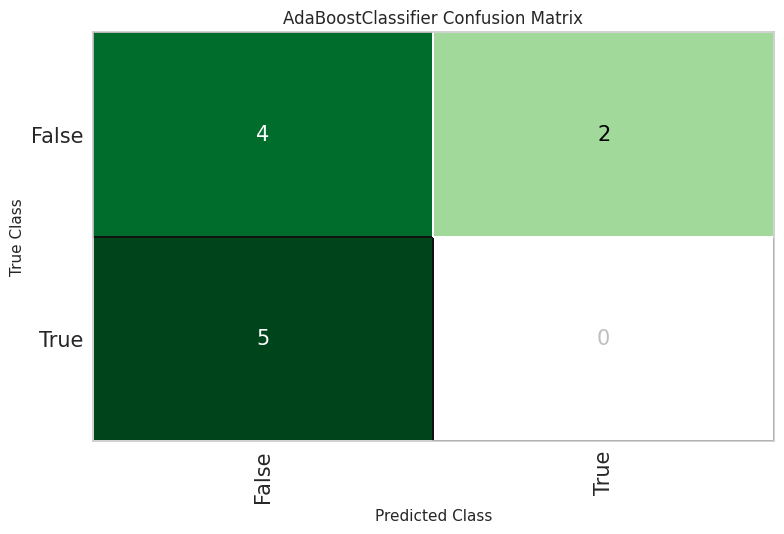

In [ ]:
s.plot_model(best, plot = 'confusion_matrix')

In [ ]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.3636,0.2667,0.0000,0.0000,0.0000,-0.3509,-0.4303


,is_home,curr_xG,opp_xG,curr_shots,opp_shots,curr_corner,opp_corner,curr_PK_Goal,opp_PK_Goal,curr_PK_shots,opp_PK_shots,possesion,Winner,prediction_label,prediction_score
93,1,1.67,1.60,27,16,7,8,0,0,0,0,0.46,False,0,0.6576
109,1,1.43,0.54,19,13,7,4,0,0,0,0,0.42,True,0,0.8788
376,1,2.59,0.73,18,13,3,3,0,0,1,0,0.72,True,0,0.7476
169,1,1.24,1.52,16,14,2,1,0,0,1,0,0.61,False,1,0.5859
429,0,1.43,1.41,17,10,6,6,0,0,0,0,0.44,True,0,0.8402
439,0,0.81,1.88,8,15,1,3,0,0,1,0,0.40,False,0,0.7536
432,0,1.05,1.63,10,20,6,6,0,0,0,0,0.38,False,0,0.7985
431,0,1.17,1.22,5,17,5,3,0,0,0,0,0.50,True,0,0.7059
325,1,1.49,1.33,19,17,6,9,0,0,0,1,0.48,True,0,0.6282
129,1,0.49,1.08,10,16,6,2,0,0,0,0,0.63,False,0,0.6931


In [ ]:
predictions = s.predict_model(best, data=X_test, raw_score=True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9350,1.0000,1.0000,0.8850,0.9390,0.8700,0.8774


,is_home,curr_xG,opp_xG,curr_shots,opp_shots,curr_corner,opp_corner,curr_PK_Goal,opp_PK_Goal,curr_PK_shots,opp_PK_shots,possesion,Winner,prediction_label,prediction_score_0,prediction_score_1
0,0,0.81,1.88,8,15,1,3,0,0,1,0,0.40,False,0,0.7536,0.2464
1,0,0.54,1.93,9,15,4,3,0,0,0,0,0.38,False,0,0.7896,0.2104
2,0,0.86,1.36,6,11,7,3,0,0,0,0,0.47,False,0,0.7692,0.2308
3,0,0.81,1.88,8,15,1,3,0,0,1,0,0.40,False,0,0.7536,0.2464
4,1,1.20,1.20,17,20,6,4,0,0,0,0,0.49,False,0,0.7513,0.2487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0.99,2.07,16,16,5,3,0,0,0,0,0.29,True,1,0.2718,0.7282
196,0,0.99,2.07,16,16,5,3,0,0,0,0,0.29,True,1,0.2718,0.7282
197,0,0.99,2.07,16,16,5,3,0,0,0,0,0.29,True,1,0.2718,0.7282
198,0,0.99,2.07,16,16,5,3,0,0,0,0,0.29,True,1,0.2718,0.7282


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

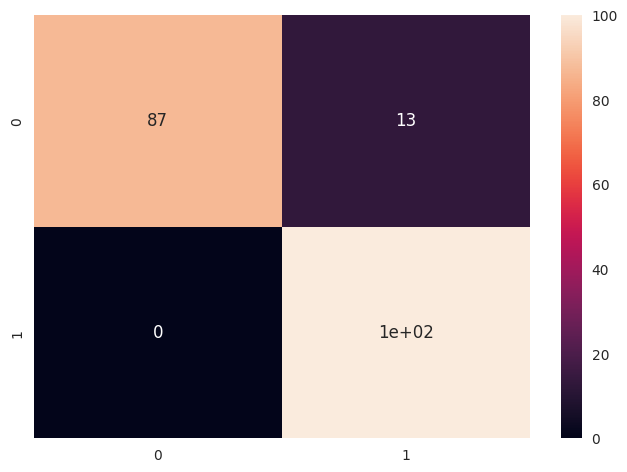

In [ ]:
# Show confusion matrix for predictions
conf_matrix = confusion_matrix(predictions['Winner'], predictions['prediction_label'])
sns.heatmap(conf_matrix, annot=True)